## Convolutional Nerual Network to classify jellyfish vs plastic

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers, models

In [87]:
# sample data from keras
# mnist = tf.keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_labels = str(train_labels)
# test_labels = str(test_labels)
# print(test_images[0],test_labels[0])

(790, 100, 100, 3)


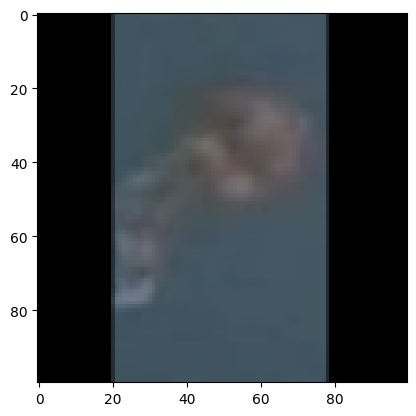

In [127]:
# data
x1 = list(np.load('jellyfish_images.npy'))
x2 = list(np.load('plastic_images.npy'))
y1 = list(np.load('jellyfish_labels.npy'))
y2 = list(np.load('plastic_labels.npy'))

y1 = [False] * len(y1) #jellyfish
y2 = [True] * len(y2) #plastic

X = []
Y = []
for i in range(len(x1)-1):
    X.append(x1[i])
    Y.append(y1[i])
for j in range(len(x2)-1):
    X.append(x2[j])
    Y.append(y2[j])
X = np.array(X)
Y = np.array(Y)

# train test split the data
seed = 10
train_images, test_images, train_labels, test_labels = train_test_split(
    X, 
    Y, 
    test_size = 0.33, 
    random_state = seed)
plt.imshow(X[0])
print(train_images.shape)

In [128]:
# constructing the model
num_classes = 2
img_height = 100
img_width = 100
img_depth = 3

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  img_depth)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

model = Sequential([
    # data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, img_depth)), #rescale RGB values to (0,1)
    layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(img_height, img_width, img_depth)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

# summary of the model constructed
model.summary()

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train the model
epochs=10
history = model.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_data=(test_images, test_labels)
)


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 25, 25, 64)      

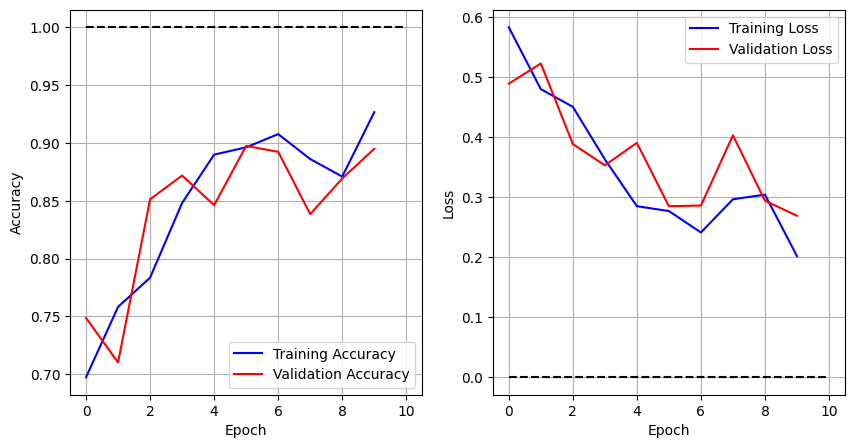

In [129]:
# plots
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.grid()
plt.plot(history.history['accuracy'], label='Training Accuracy',color='blue')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy',color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.hlines(y=1.0,xmin=0,xmax=epochs,linestyle='--',color='black')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.grid()
plt.plot(history.history['loss'], label='Training Loss',color='blue')
plt.plot(history.history['val_loss'], label = 'Validation Loss',color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.hlines(y=0,xmin=0,xmax=epochs,linestyle='--',color='black')
plt.legend(loc='best')
plt.show()

13/13 - 2s - loss: 0.2692 - accuracy: 0.8949 - 2s/epoch - 191ms/step
0.2692268490791321 0.8948717713356018
[0.99666435 0.00333568]


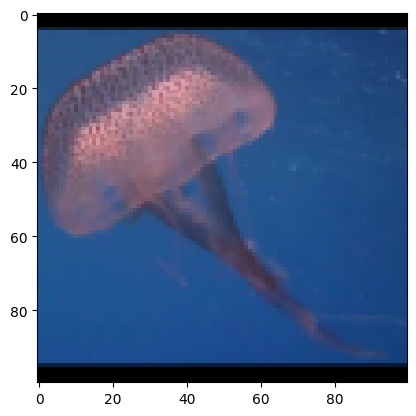

In [156]:
# model evaluation
probability_model = models.Sequential([model, tf.keras.layers.Softmax()])
predicts = probability_model.predict_on_batch(test_images)

# predicts = np.where(predicts[:,1] > 0.5, 1, 0)

# print(classification_report(test_labels, predicts))
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_loss,test_acc)

num_pic = 9
plt.imshow(test_images[num_pic])
print(predicts[num_pic])

In [145]:
model.save('zfg_1.h5')